In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df=pd.read_csv(r"C:\Users\admin\Desktop\DA Diwali Sales Project\Diwali Sales.csv", encoding="unicode_escape")
df
#encoding is done to advoid encoding error
#r is used to ignore special character in file path/name

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
#Delete column status and unnames1
df.drop(['Status','unnamed1'],axis=1, inplace=True)

In [12]:
#Find null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [15]:
#Delete null values
df.dropna(inplace=True)

In [19]:
#changing datatype of amount to int
df['Amount']=df['Amount'].astype('int')

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [23]:
#change the column name
df.rename(columns={'Age Group':'Age_Group'}, inplace=True)

In [26]:
#data discrption
df.describe()

# we can find the counts, max, min and mean of the required data

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# EDA

#### GENDER

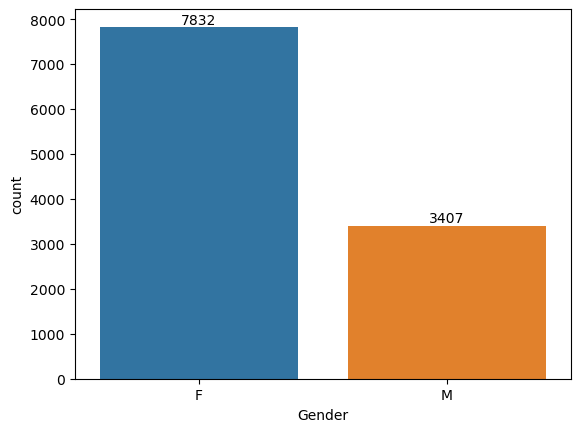

In [31]:
ax=sns.countplot(x='Gender', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [32]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

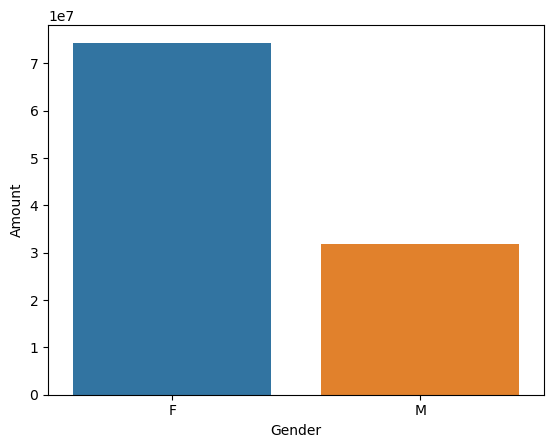

In [33]:
sns.barplot(x='Gender', y='Amount', data=sales_gen)


### Age Group

<AxesSubplot:xlabel='Age_Group', ylabel='count'>

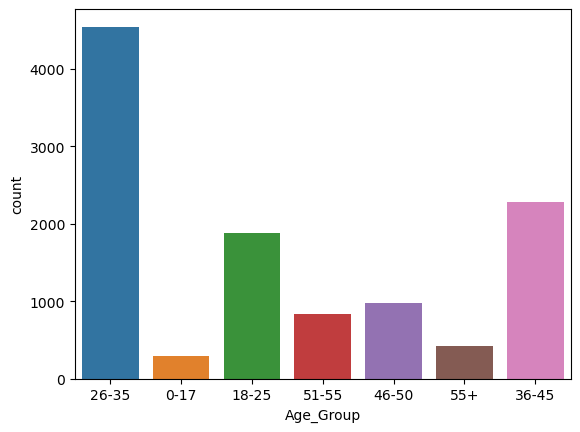

In [36]:
sns.countplot(data=df, x="Age_Group")

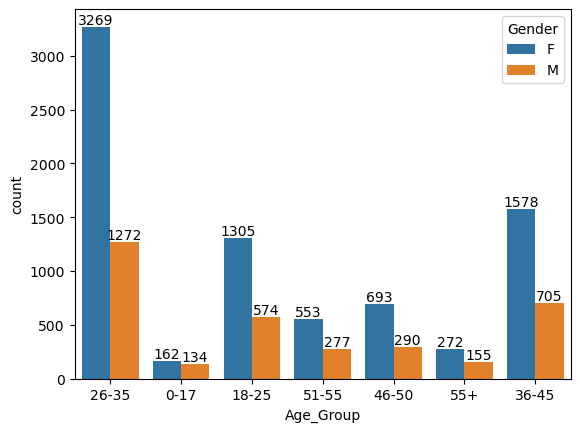

In [38]:
ax=sns.countplot(data=df, x="Age_Group", hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

In [41]:
sales_age=df.groupby(['Age_Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sales_age

,Age_Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


<AxesSubplot:xlabel='Age_Group', ylabel='Amount'>

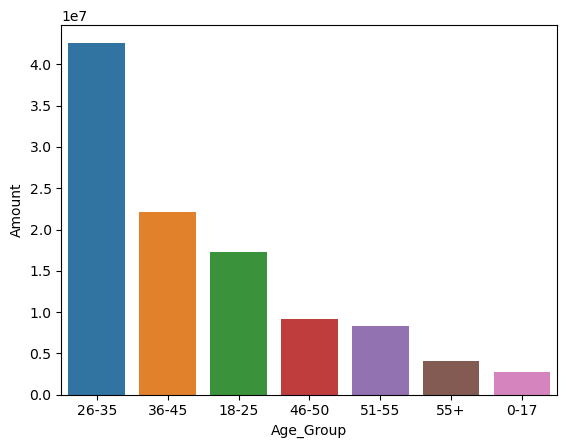

In [44]:
sns.barplot(x='Age_Group',y='Amount', data=sales_age
           )

#### State

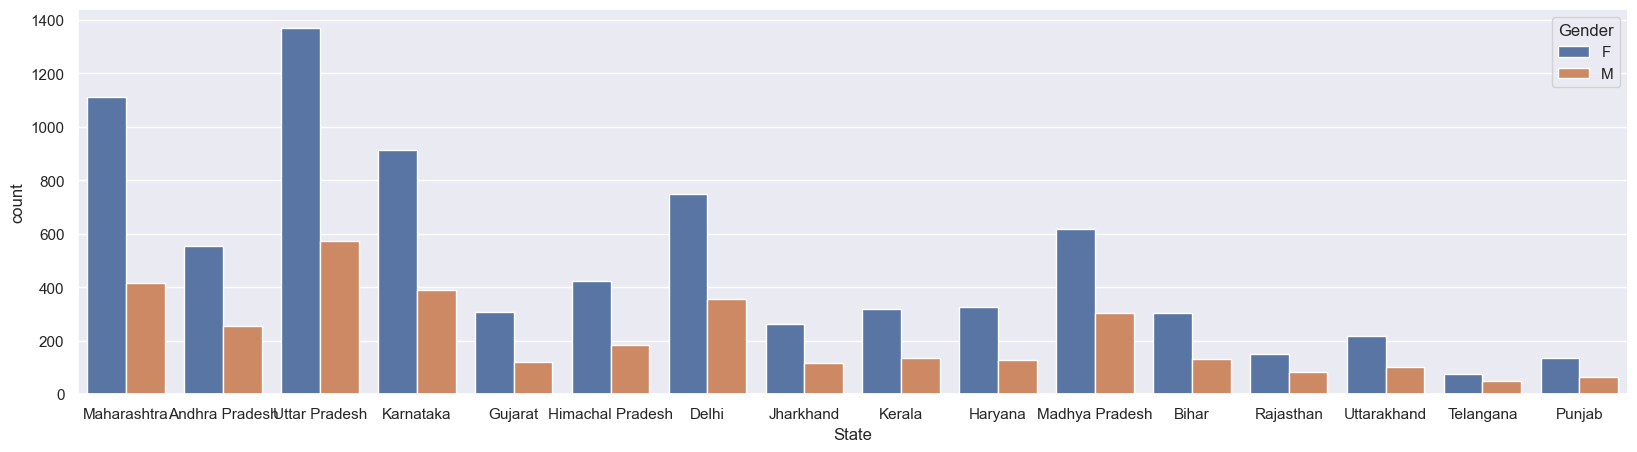

In [51]:
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(data=df, x="State", hue='Gender')


<AxesSubplot:xlabel='State', ylabel='Orders'>

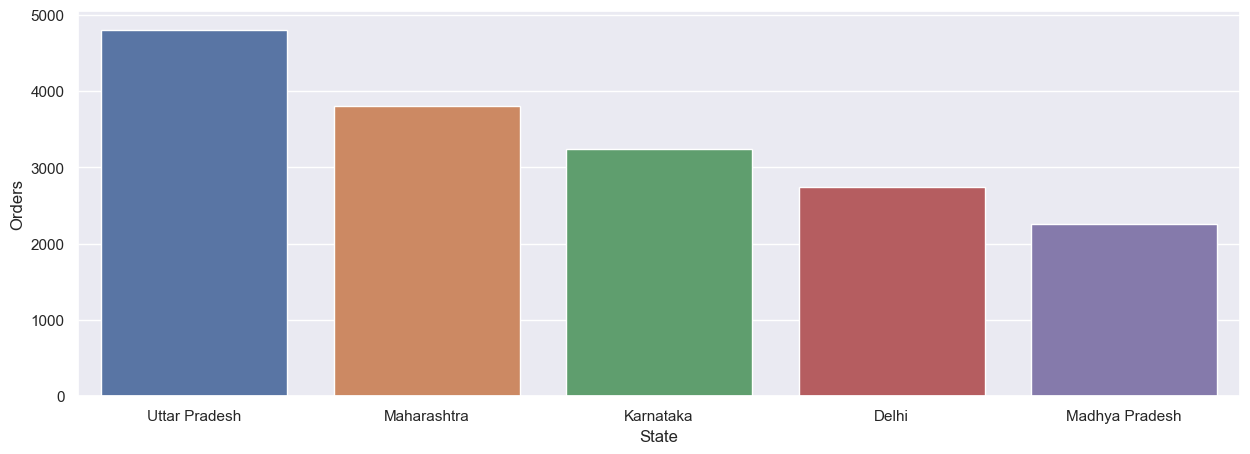

In [56]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State',y='Orders')

<AxesSubplot:xlabel='State', ylabel='Orders'>

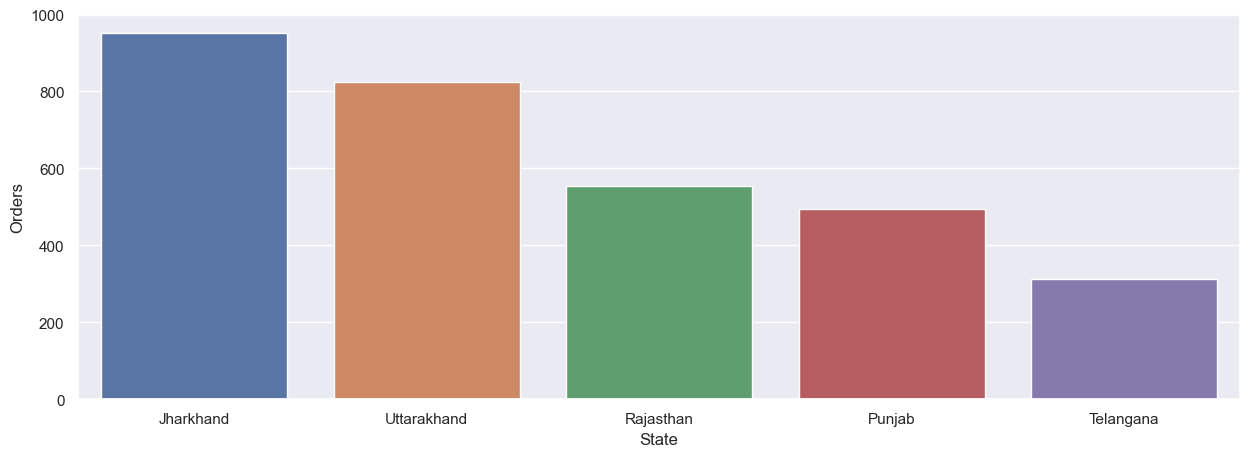

In [57]:
sales_state=df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).tail(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state, x='State',y='Orders')

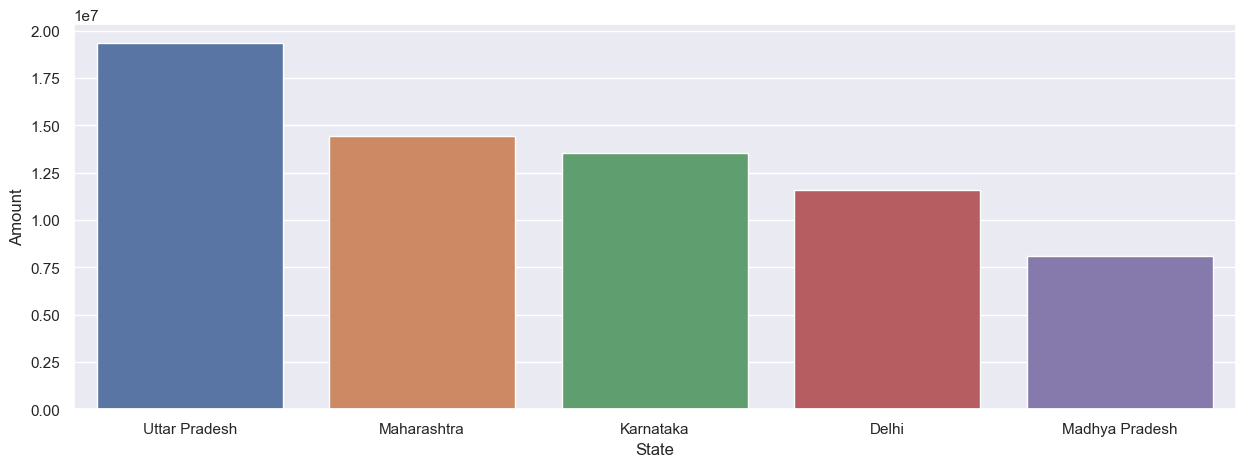

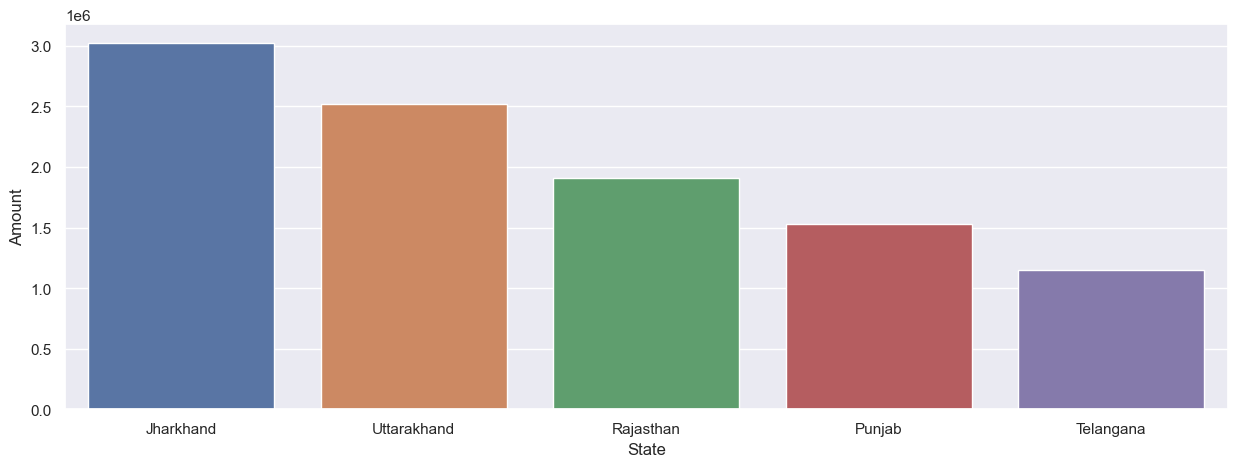

In [59]:
sales_state_top=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state_top, x='State',y='Amount')
plt.show()

sales_state_bottom=df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).tail(5)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=sales_state_bottom, x='State',y='Amount')
plt.show()

#### Marital Status

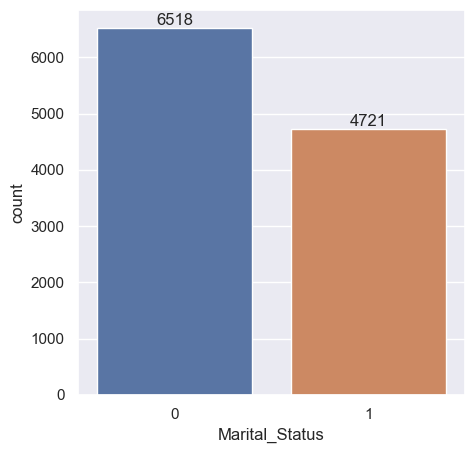

In [64]:
ax=sns.countplot(data=df, x="Marital_Status")

sns.set(rc={'figure.figsize':(7,4)})
for bars in ax.containers:
    ax.bar_label(bars)

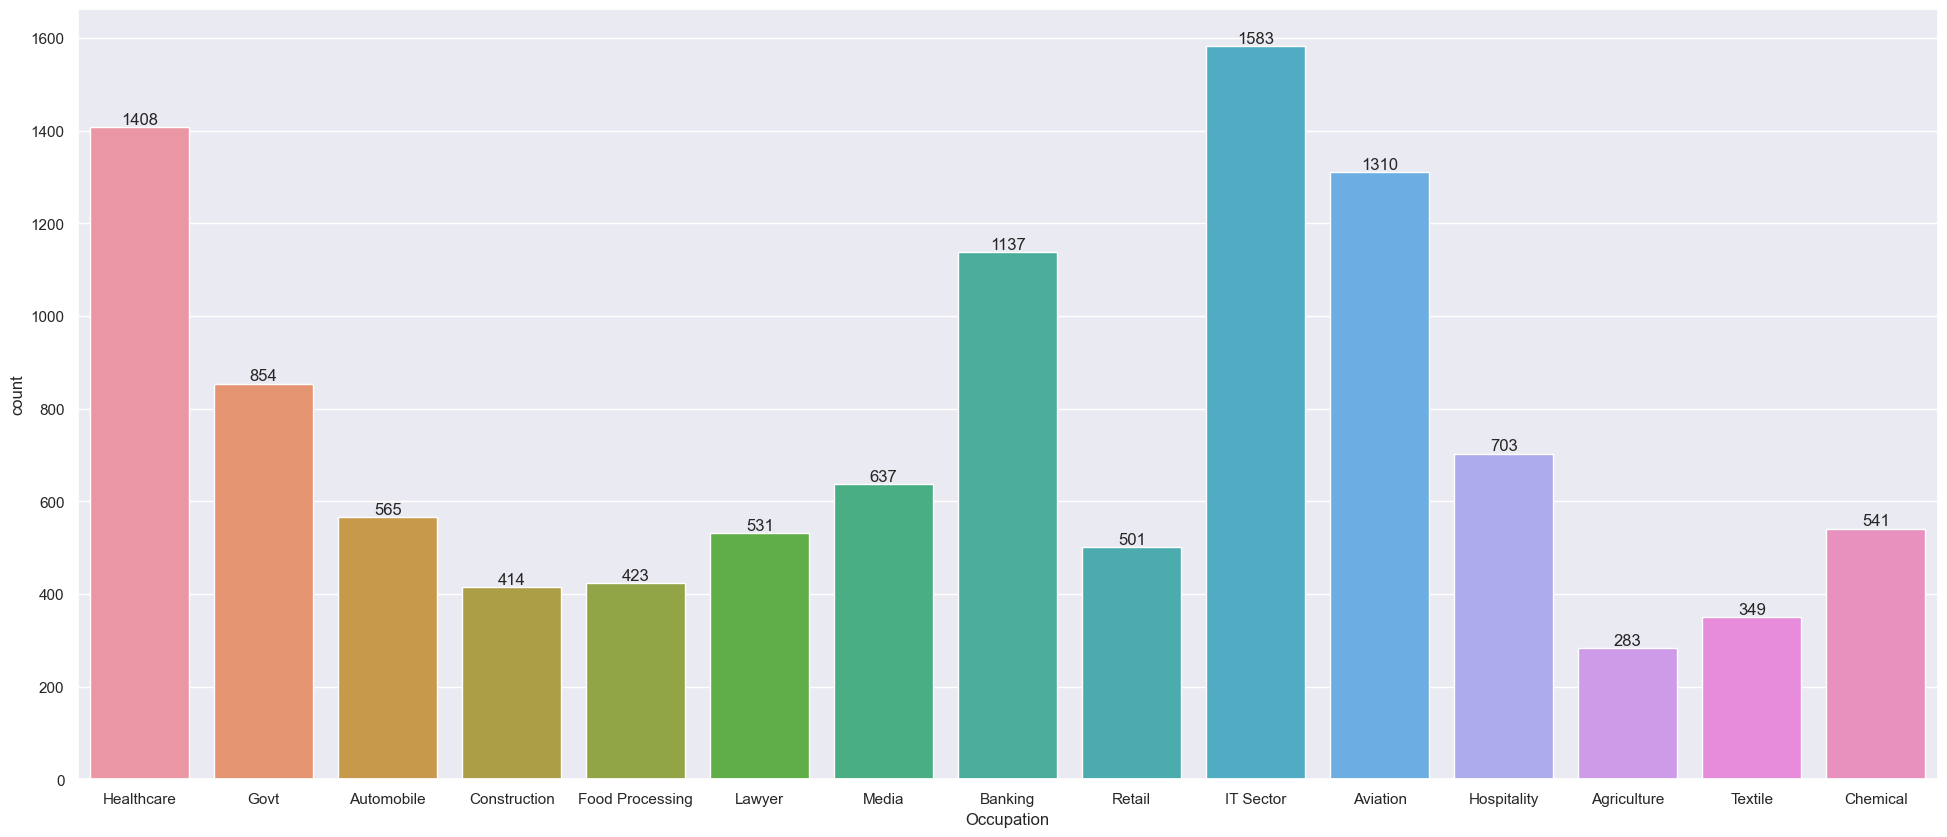

In [72]:
ax=sns.countplot(data=df, x="Occupation")

sns.set(rc={'figure.figsize':(24,6)})
for bars in ax.containers:
    ax.bar_label(bars)

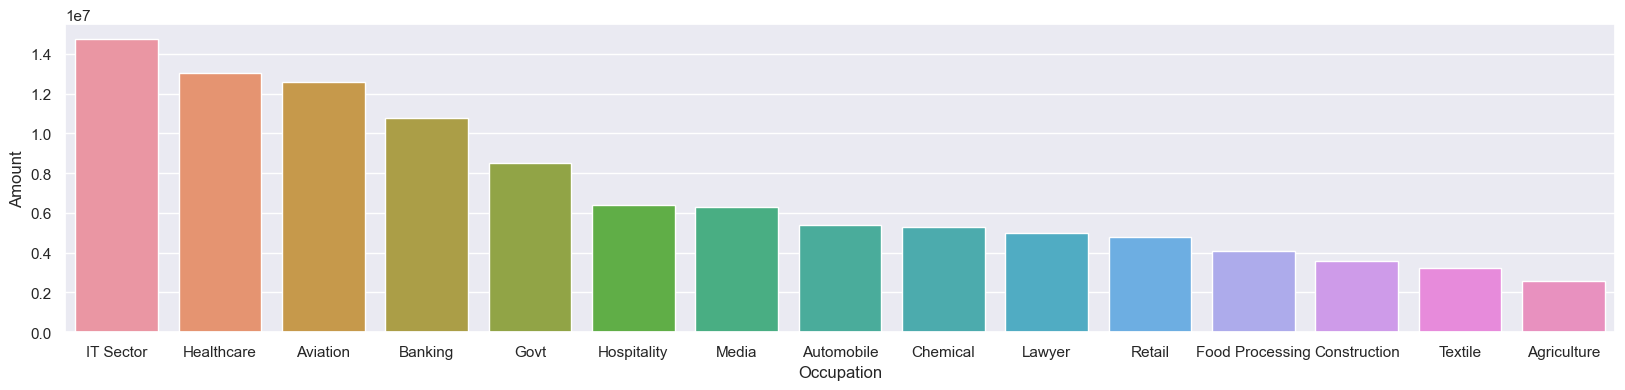

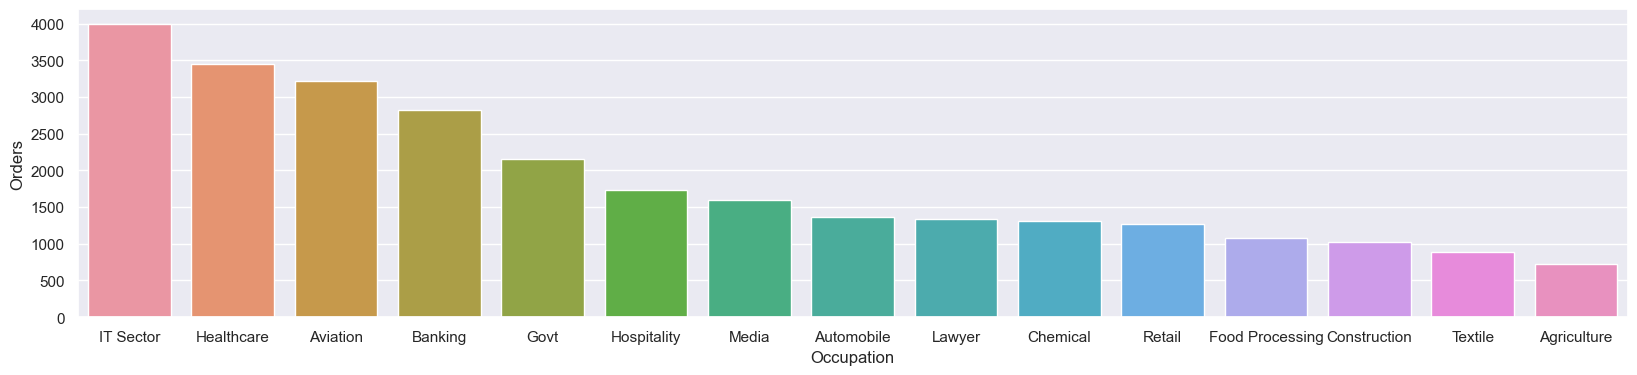

In [81]:
sales_occupation=df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data=sales_occupation, x='Occupation',y='Amount')
plt.show()



sales_occupation=df.groupby(['Occupation'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data=sales_occupation, x='Occupation',y='Orders')
plt.show()

#### Product Category

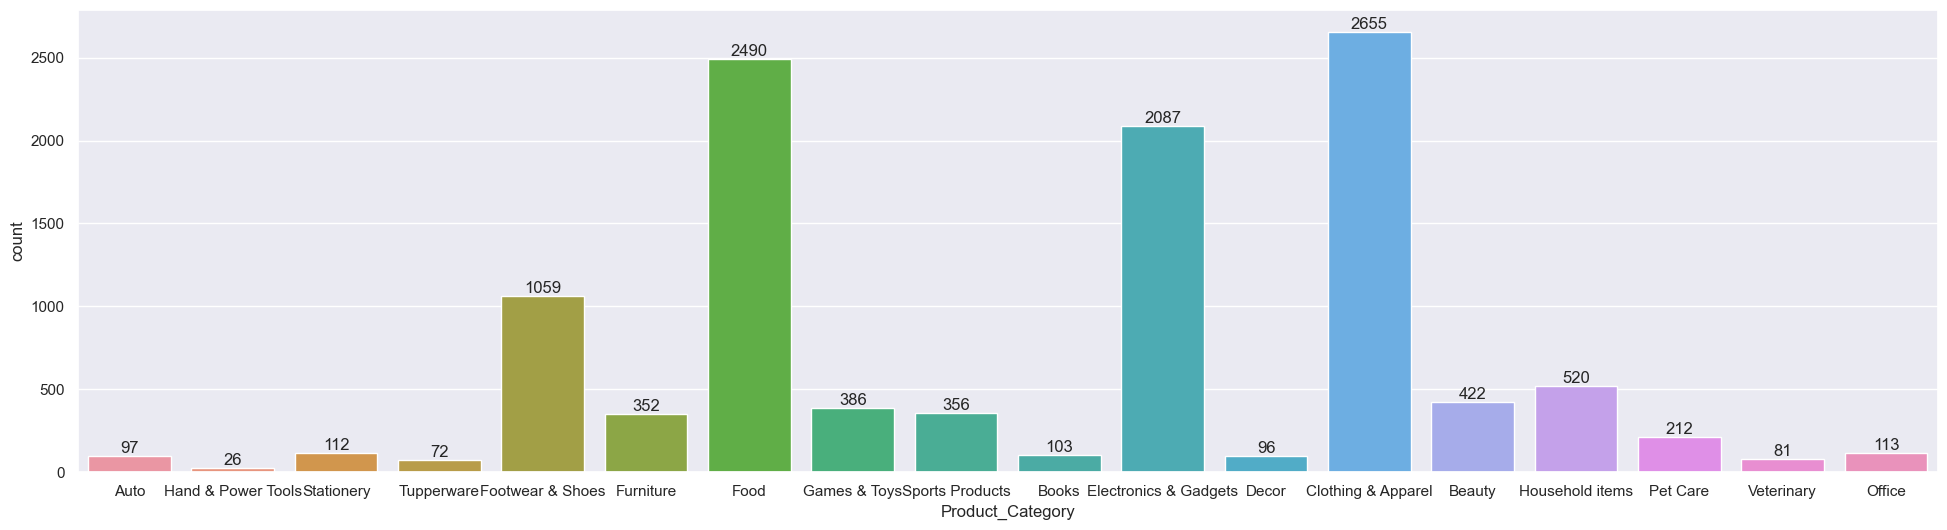

In [84]:
ax=sns.countplot(data=df, x="Product_Category")

sns.set(rc={'figure.figsize':(24,6)})
for bars in ax.containers:
    ax.bar_label(bars)

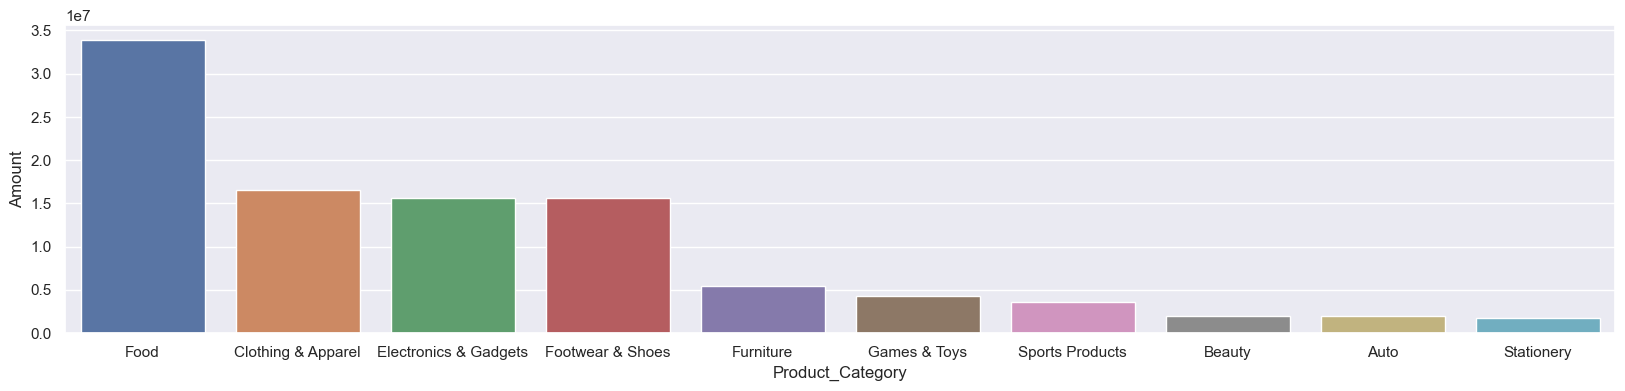

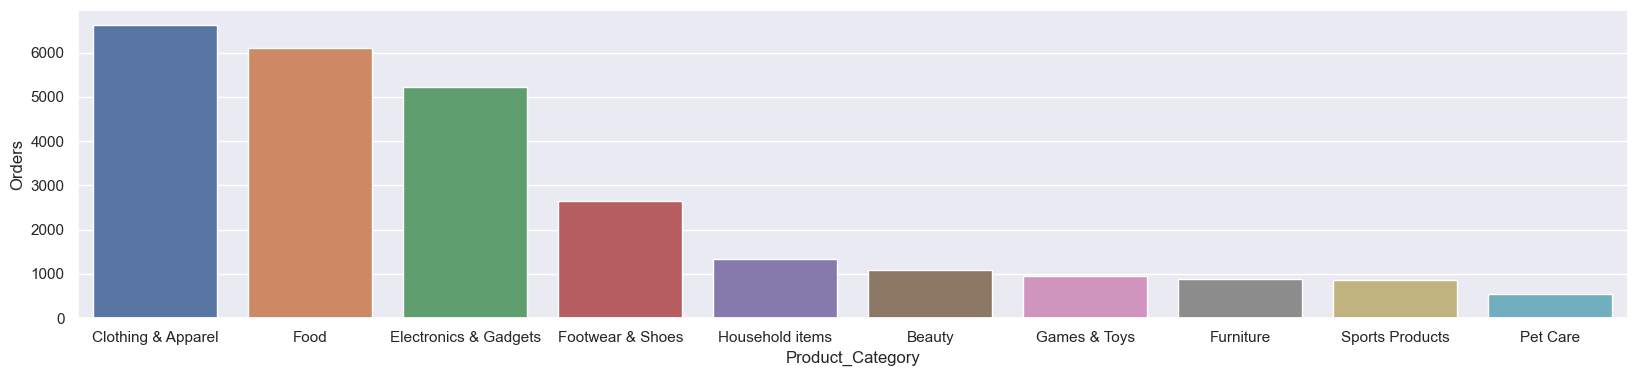

In [86]:
sales_occupation=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data=sales_occupation, x='Product_Category',y='Amount')
plt.show()



sales_occupation=df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data=sales_occupation, x='Product_Category',y='Orders')
plt.show()

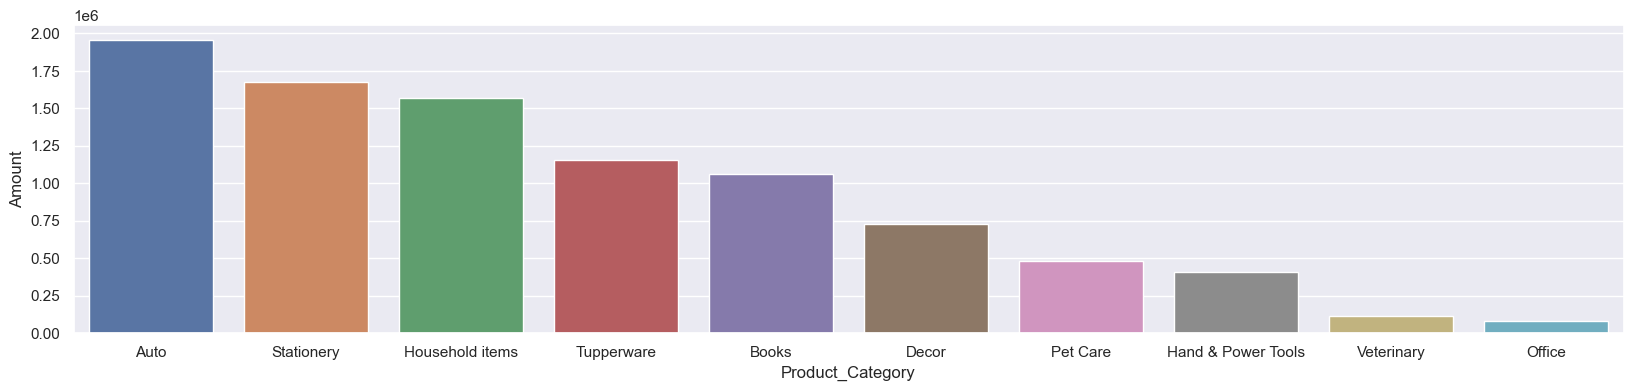

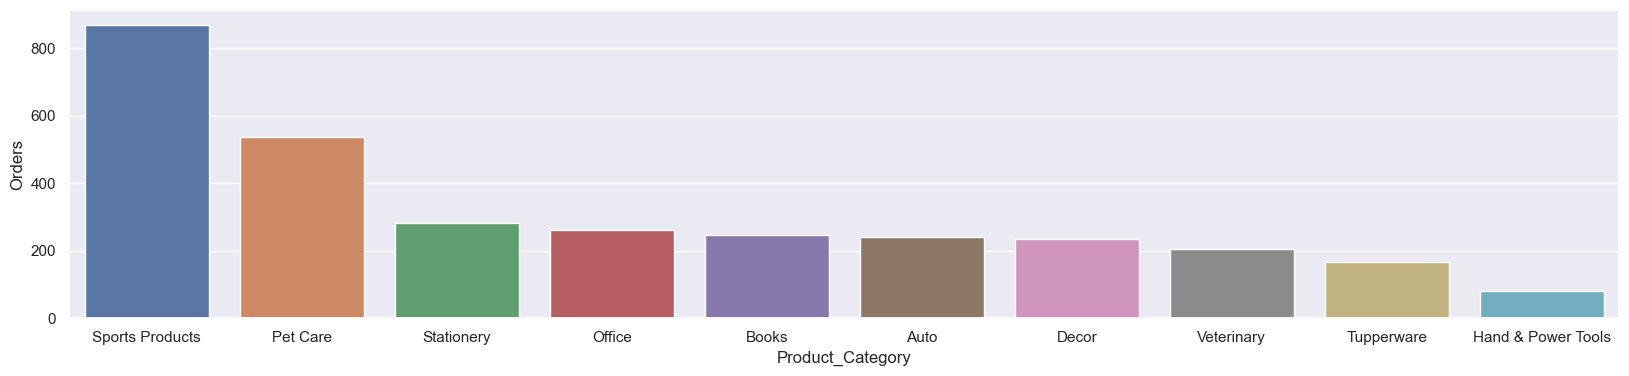

In [87]:
sales_occupation=df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).tail(10)
sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data=sales_occupation, x='Product_Category',y='Amount')
plt.show()



sales_occupation=df.groupby(['Product_Category'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).tail(10)
sns.set(rc={'figure.figsize':(20,4)})
sns.barplot(data=sales_occupation, x='Product_Category',y='Orders')
plt.show()

# Conclusion and Insights

###### More number of Shopping is done by Female
###### Age group between 26 to 35
###### Uttar Pradesh, Maharashtra and Karnataka provides more sales revenue
###### People from IT, Healthcare, Aviations and Bank contribute more to the sales
###### Food, Clothing, Household Items are the items sold more

###### We can concentrate more on these area to improve more business and also we need to have a good inventory plan